# Practical Time Series Analysis

## Week 3: Stationarity, MA(q) and AR(p) processes

**1. Stationarity**

**2. Backward shift operator**

**3. Invertibility**

**4. Duality**

**5. Autoregressive processes**

**6. Yule-Walker equations**

## 1. Stationarity

**Stochastic Processes vs Time Series**

A stochastic process is a family of random variables structured with a time index, denoted $X_t$ for discrete processes and $X(t)$ for continuous processes.

* Discrete stochastic processes may model, for instance, the recorded daily high temperatures in Melbourne, Australia.
* A commonly encountered continuous process is the Weiner Process, describing a particle's position as a function of time as it floats on the surface of a liquid (Brownian Motion).
* A stochastic process is a complicated thing! To fully specify its structure we would need to know the joint distribution of the full set of random variables. Good luck!
* We usually just have one sequentially observed data set and must infer the properties of the generating process from this single trajectory.

**Mean, Variance and Autocovariance Functions**

* **Mean Function**: $\mu(t) \equiv \mu_t \equiv E[X(t)]$
* **Variance Function**: $\sigma^2(t) \equiv \sigma_t^2 \equiv V[X(t)]$
* White noise: independent identically distributed random variables
    * Mean Function: $\mu(t) = C$ (constant)
    * Variance Function $\sigma^2(t) = C$ (constant)
    * Auto Covariance Function: $\gamma(t_1, t_2) = 0$


**Strict Stationarity: Definition**

We say a process is Strictly Stationary if the Joint Distribution of

$X(t_1), X(t_2), ... , X(t_k)$

is the same as the joint distribution of

$X(t_1 + \tau), X(t_2 + \tau), ... , X(t_k + \tau)$

Implication:

* Distribution of $X(t_1)$ same as $X(t_1 + \tau)$
* The random variables are identically distributed, though not necessarily independent.
* Mean Function: $\mu(t) = \mu$
* Variance Function $\sigma(t) = \sigma^2$
* Joint distribution of $X(t_1), X(t_2)$ same as joint distribution of $X(t_1 + \tau), X(t_2 + \tau)$, that is, the joint distribution depends only on the lag spacing, so:
    * Autocovariance Function: $\gamma(t_1, t_2) = \gamma(t_2 - t_1) = \gamma(\tau)$

**Weak Stationarity: Definition**

We say a process is weakly stationary if:

* Mean Function: $\mu(t) = \mu$
* ACF: $\gamma(t_1, t_2) = \gamma(t_2 - t_1) = \gamma(\tau)$

Implication:

* Constant variance

**White Noise is Stationary!**

Consider a discrete family of independent, identically distributed normal random variables (often Gaussian):

* $X_t \sim iid(0, \sigma^2)$ or $X_t \sim iid N(0, \sigma^2)$

Mean function $\mu(t) = 0$ is obviously constant, so consider

$\begin{equation} 
    \gamma(t_1, t_2) =
        \begin{cases}
          0 & t_1 \neq t_2\\
          \sigma^2 & t_1 = t_2
        \end{cases}       
\end{equation}$

**Random Walks are Not Stationary!**

Start with iid random variables $Z_t \sim iid(\mu, \sigma^2)$, build a walk with $t$ steps:

* $X_t = X_{t-1} + Z_t = \sum^t_{i=1}Z_i$

Mean and variance:

* $E[X_t] = E[\sum^t_{i=1}Z_i] = \sum^t_{i=1}E[Z_i] = t \cdot \mu$
* $V[X_t] = V[\sum^t_{i=1}Z_i] = \sum^t_{i=1}V[Z_i] = t \cdot \sigma^2$

**Moving Average Processes are Stationary!**

Start with iid random variables $Z_t \sim iid(0, \sigma^2)$

* MA(q) process: $X_t = \beta_0 Z_t + \beta_1 Z_{t-1} + ... + \beta_q Z_{t-q}$

where $q$ tells us how far back to look along the white noise sequence for our weighted average.

The larger the value of $q$, the smoother the series.

**ACF for Moving Average Process**

For a $k$ lag considering a $MA(q)$ process, we have the following covariance:

* $cov[X_t, X_{t+k}] = \sigma^2 \cdot \sum^{q-k}_{i=0} \beta_i \beta_{i+k}$ (no t dependence)

## 2. Backward shift operator

**Sequence**

Sequence ${a_n}$ is list of numbers in definite order

* $a_1, a_2, a_3, ..., a_n, ...$

If the limit of the sequence exists, i..e,
$\lim_{n \rightarrow \infty } a_n = a$,
then we say the sequence is convergent.

**Partial sums**

Partial sums os a sequence $a_n$ area defined as:
* $s_n = a_1 + a_2 + ... + a_n$

**Series**

If the partial sums ${s_n}$ is convergent to a number s, then we say the infinite series $\sum^\infty_{k=1} a_k$ is convergent, and is equal to s.

* $\sum^\infty_{k=1} a_k = lim_{n \rightarrow \infty} s_n = lim_{n \rightarrow \infty}(a_1 + a_2 + ... + a_n) = s$

A series is absolutely convergent if:

* $\sum^\infty_{k = 1} |a_k|$ is convergent

Geometric sequence:

* $\{ar^{n-1}\}^\infty_{n-1} = \{a, ar, ar^2, ar^3, ...\}$

Geometric series
* $\sum^\infty_{k-1} ar^{k-1} = \frac{a}{1-r}, \text{if |r| < 1}$

**Backward shift operator**

Considering a stochastic process $X_1, X_2, X_3,...$, the backward shift operator is defined as:

* $B X_t = X_{t-1}$
* Generalizing: $B^k X_t = X_{t-k}$

Example - MA(2) process:

* $X_t = Z_t + 0.2 Z_{t-1} + 0.04 Z_{t-2}$
* $X_t = Z_t + 0.2 B Z_t + 0.04 B^2 Z_t$
* $X_t = (1 + 0.2 B + 0.04 B^2) Z_t$
* $X_t = \beta (B) Z_t$

where: $\beta(B) = 1 + 0.2 B + 0.04 B^2$

## 3. Invertibility


**Inverting through backward substitution**

MA(1) process

* $X_t = Z_t + \beta Z_{t-1}$
* $Z_t = X_t - \beta Z_{t-1} = X_t - \beta (X_{t-1} - \beta Z_{t-2}) = X_t - \beta X_{t-1} + \beta^2 Z_{t-2}$

In this manner,

* $Z_t = X_t - \beta X_{t-1} + \beta^2 X_{t-2} - \beta^3 X_{t-3} + ...$

i.e.,

* $X_t = Z_t + \beta X_{t-1} - \beta^2 X_{t-2} + \beta^3 X_{t-3} - ...$

We 'inverted' MA(1) process to AR($\infty$).

**Inverting using Backward shift operator**

Consider:

* $X_t = \beta(B) Z_t$

where $\beta(B) = 1 + \beta B$

Then, we find $Z_t$ by inverting the polynomial operator $\beta (B)$:

* $\beta (B)^{-1} X_t = Z_t$

Inverse of $\beta(B)$:

* $\beta (B)^{-1} = \frac{1}{1 + \beta B} = 1 - \beta B + \beta^2 B^2 - \beta^3 B^3 + ...$

Here, we expand the inverse of the polynomial operator as a 'rational function where $\beta B$ is a complex number'.

Thus we obtain,

* $\beta (B)^{-1} X_t = X_t - \beta X_{t-1} + \beta^2 X_{t-2} - \beta^3 X_{t-3} + ...$

And we can reconsider $Z_t$ as:

* $Z_t = \sum^{\infty}_{n=0}(-\beta)^n X_{t-n}$

In order to make sure that the sum on the right is convergent (in the mean-square sense), we need $|\beta| < 1$

**Invertibility - Definition**

* $\{X_t\}$ is a stochastic process.
* $\{Z_t\}$ is innovations, i.e., random disturbances or white noise.
* $\{X_t\}$ is called *invertible*, if $Z_t = \sum^{\infty}_{k=0} \pi_k X_{t-k}$, where $\sum^{\infty}_{k=0} |\pi_k|$ is convergent.
* Invertibility condition guarantees unique MA process corresponding to observed ACF

## 4. Duality

**MA(q) process**

* $X_t = \beta_0 Z_t + \beta_1 Z_{t-1} + ... + \beta_q Z_{t-q}$

Using Backward shift operator,

* $X_t = (\beta_0 + \beta_1 B + ... + \beta_q B^q) Z_t = \beta(B) Z_t$

We obtain innovations $Z_t$ in terms of present and past values of $X_t$,

* $Z_t = \beta(B)^{-1} X_t = (\alpha_0 + \alpha_1 B + \alpha_2 B^2 + ...) X_t$

MA(q) process is invertible if the roots of the polynomial $\beta (B)$ all lie outside the unit circle (>1), where we regard $B$ as a complex variable (not an operator).

**Stationarity condition for AR(p)**

AR(p) process

* $X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + ... + \phi_p X_{t-p} + Z_t$

is (weakly) stationary if the roots of the polynomial 

* $\phi (B) = 1 - \phi_1 B - \phi_2 B^2 - ... - \phi_p B^p$

all lie outside the unit circle (>1), where we regard $B$ as a complex variable (not an operator).

AR(p) process $\implies$ MA($\infty$) process, if AR(p) is stationary.

**Duality between AR and MA processes**

* Under invertibility condition of MA(q):
    * MA(q) $\implies$ AR($\infty$)
* Under stationarity condition of AR(p):
    * AR(p) $\implies$ MA($\infty$)

## 5. Autoregressive processes

**AR(p) process**

$X_t = Z_t + history$

What does "history" mean? 

Consider innovations $Z_t$ from white noise $Z_t \sim iid(0, \sigma^2)$. 

By history we mean previous terms in the process:

* $X_t = Z_t + \phi X_{t-1} + ... + \phi_p X_{t-p}$

Current position obtained as position we occupied at the previous time, plus a noise variable:

* $X_t = X_{t-1} + Z_t$

A quick caution: an autoregressive process isn't necessarily stationary! (Condition for stationarity explained in the last section)

### AR(1) process, $\phi = 0.4$

In [25]:
# AR(1) process, phi = 0.4
set.seed(2016)
N = 1000
phi = .4
Z = rnorm(N, 0, 1)
X = NULL
X[1] = Z[1]

for (t in 2:N) {
    X[t] = Z[t] + phi * X[t-1]
}

X.ts = ts(X)

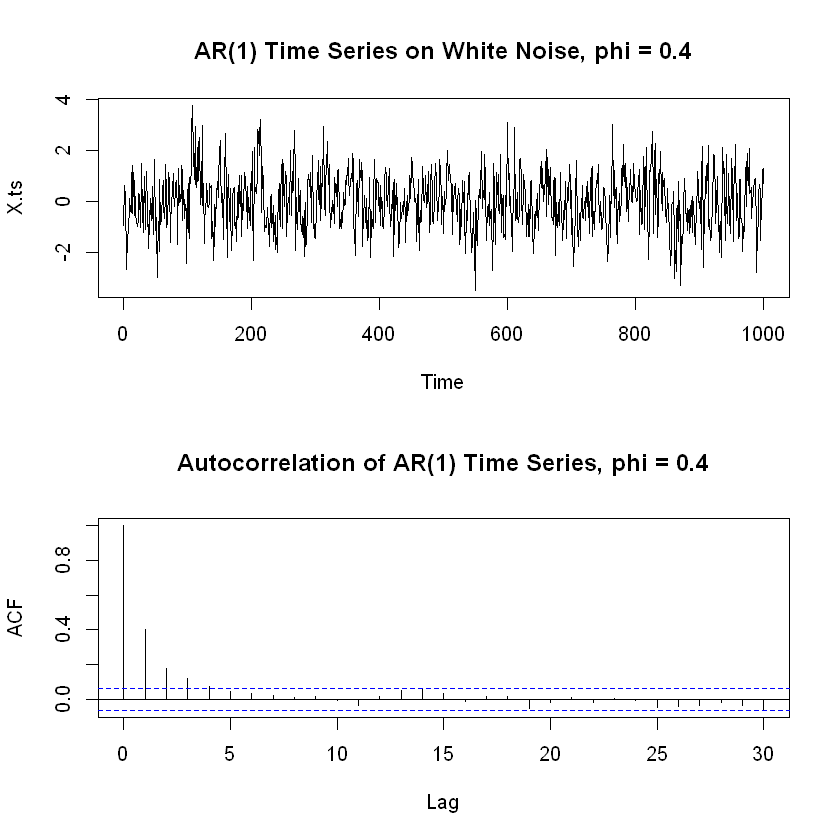

In [26]:
# plot AR(1), phi = 0.4
par(mfrow = c(2,1))
plot(X.ts, main = paste("AR(1) Time Series on White Noise, phi =", phi))
X.acf = acf(X.ts, main = paste("Autocorrelation of AR(1) Time Series, phi =", phi))

### AR(1) process, $\phi = 1$

In [27]:
# AR(1) process, phi = 1
set.seed(2016)
N = 1000
phi = 1
Z = rnorm(N, 0, 1)
X = NULL
X[1] = Z[1]

for (t in 2:N) {
    X[t] = Z[t] + phi * X[t-1]
}

X.ts = ts(X)

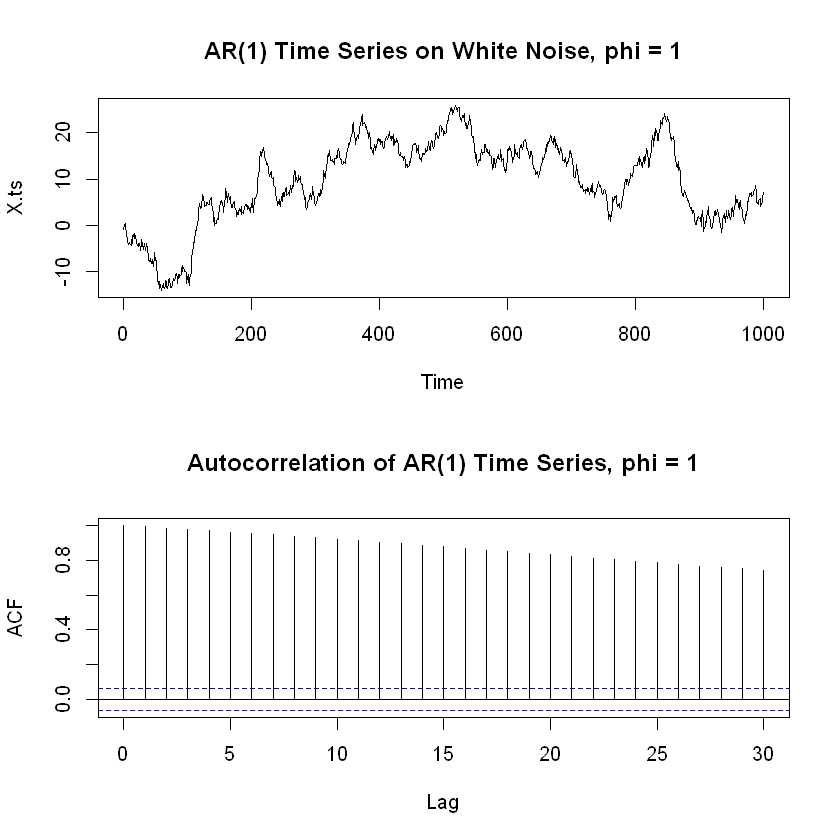

In [28]:
# plot AR(1), phi = 1
par(mfrow = c(2,1))
plot(X.ts, main = paste("AR(1) Time Series on White Noise, phi =", phi))
X.acf = acf(X.ts, main = paste("Autocorrelation of AR(1) Time Series, phi =", phi))

### AR(2) process, $X_t = Z_t + 0.7 X_{t-1} + 0.2 X_{t-2}$

**Stationarity**

* $-1 < \phi_2 < 1$
* $\phi_2 < 1 + \phi_1$
* $\phi_2 < 1 - \phi_1$

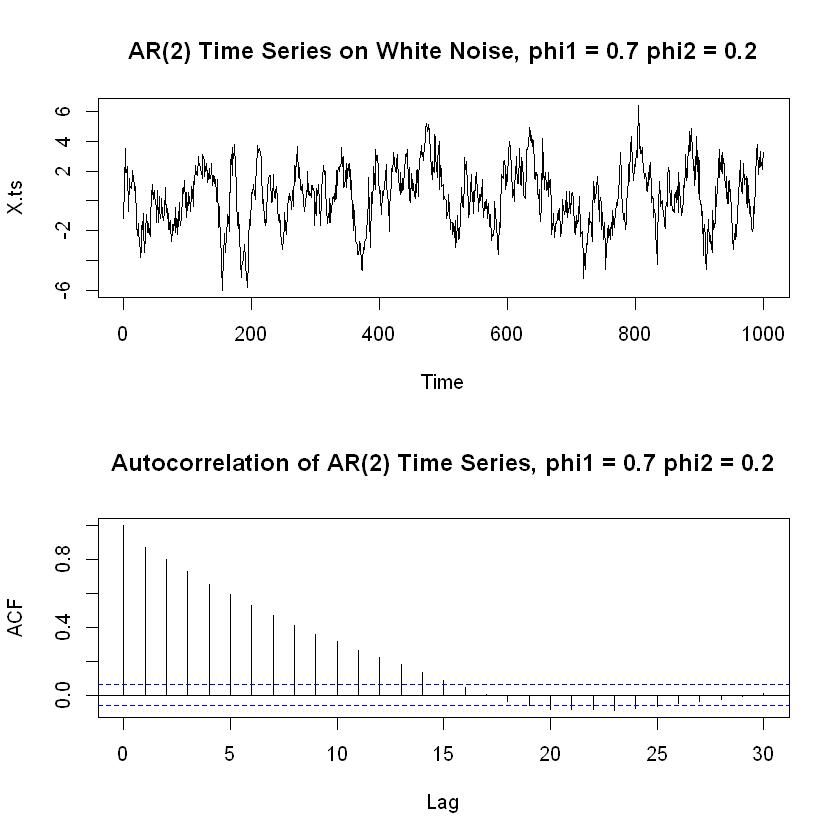

In [29]:
# AR(2) process, X_t = Z_t + 0.7 X_t-1 + 0.2 X_t-2
phi1 = 0.7
phi2 = 0.2
set.seed(2017)
X.ts = arima.sim(list(ar = c(phi1, phi2)), n = 1000)

par(mfrow = c(2,1))
plot(X.ts, main = paste("AR(2) Time Series on White Noise, phi1 =", phi1, "phi2 =", phi2))
X.acf = acf(X.ts, main = paste("Autocorrelation of AR(2) Time Series, phi1 =", phi1, "phi2 =", phi2))

### AR(2) process, $X_t = Z_t + 0.5 X_{t-1} - 0.4 X_{t-2}$

**Stationarity**

* $-1 < \phi_2 < 1$
* $\phi_2 < 1 + \phi_1$
* $\phi_2 < 1 - \phi_1$

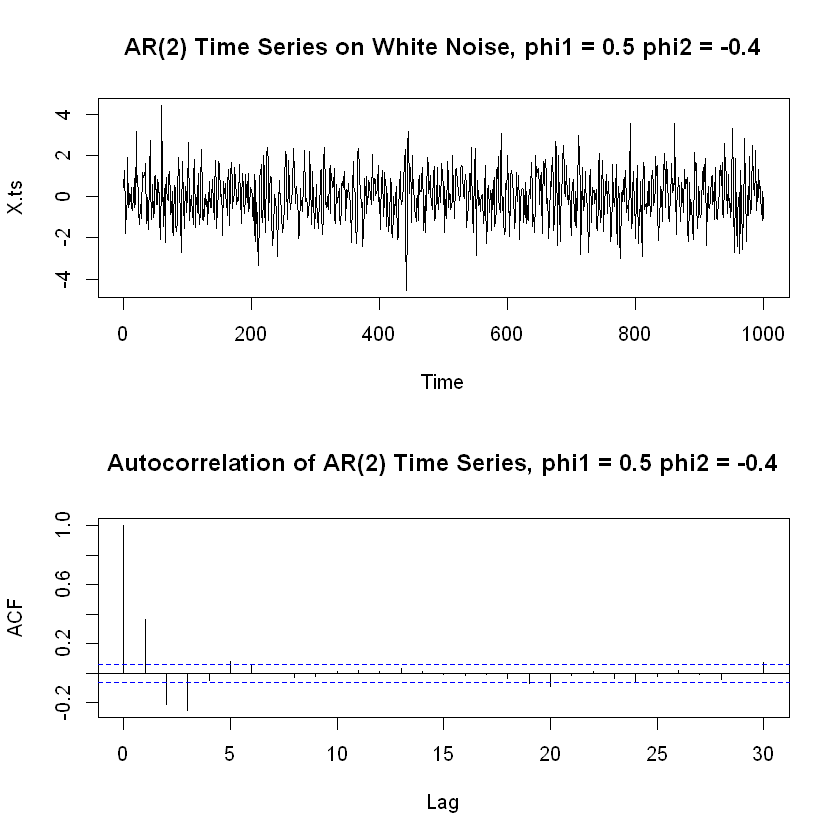

In [33]:
# AR(2) process, X_t = Z_t + 0.5 X_t-1 - 0.4 X_t-2
phi1 = 0.5
phi2 = -0.4
set.seed(2017)
X.ts = arima.sim(list(ar = c(phi1, phi2)), n = 1000)

par(mfrow = c(2,1))
plot(X.ts, main = paste("AR(2) Time Series on White Noise, phi1 =", phi1, "phi2 =", phi2))
X.acf = acf(X.ts, main = paste("Autocorrelation of AR(2) Time Series, phi1 =", phi1, "phi2 =", phi2))

## 6. Yule-Walker equations

**Difference equation**

General term of a sequence is given, ex: $a_n = 2n + 1$. So, $3, 5, 7, ...$

General term not given, but relation is given, ex: $a_n = 5 a_{n-1} - 6 a_{n-2}$

This is a difference equation (recursive relation).

We look for a solution in the format:

* $a_n = \lambda^n$

For the previous problem:

* $\lambda^n = 5 \lambda^{n-1} - 6 \lambda^{n-2}$
* Simplify: $\lambda^2 - 5 \lambda + 6 = 0 \rightarrow$ Auxiliary equation or characteristic equation
* $\lambda = 2, \lambda = 3$
* $a_n = c_1 2^n + c_2 3^n$
* With some initial conditions, say $a_0 = 3, a_1 = 8$.

\begin{equation}
        \begin{cases}
          c_1 + c_2 = 3\\
          2 c_1 + 3 c_2 = 8
        \end{cases}       
    \end{equation}

* $c_1 = 1, c_2 = 2$

Solution:

* $a_n = 2^n + 2 \cdot 3^n$
* Solution for the $2^{nd}$ order difference equation: $a_n = 5 a_{n-1} - 6 a_{n-2}$

**Example - Fibonacci sequence**

Fibonacci sequence is defined as follows: $1, 1, 2, 3, 5, 8, 13, 21, ...$

i.e., every term starting from the $3^{rd}$ term is addition of the previous two terms. What is the general term, $a_n$, of the Fibonacci sequence?

We are looking for a sequence $\{a_n\}^\infty_{n = 0}$, such that

* $a_n = a_{n-1} + a_{n-2}$
* where $a_0 = 1, a_1 = 1$.

Characteristic equation becomes:

* $\lambda^2 - \lambda - 1 = 0$
* Roots: $\lambda_1 = \frac{1 - \sqrt{5}}{2}, \lambda_2 = \frac{1 + \sqrt{5}}{2}$
* $a_n = c_1 \left(\frac{1 - \sqrt{5}}{2}\right)^n + c_2 \left(\frac{1 + \sqrt{5}}{2}\right)^n$
\begin{equation}
        \begin{cases}
          c_1 + c_2 = 1\\
          c_1 \left(\frac{1 - \sqrt{5}}{2}\right) + c_2 \left(\frac{1 + \sqrt{5}}{2}\right) = 1
        \end{cases}       
    \end{equation}
* $c_1 = \frac{5 - \sqrt{5}}{10} = -\frac{1}{\sqrt{5}}\left(\frac{1 - \sqrt{5}}{2}\right)$
* $c_2 = \frac{5 + \sqrt{5}}{10} = \frac{1}{\sqrt{5}}\left(\frac{1 + \sqrt{5}}{2}\right)$

Finally:

* $a_n = -\frac{1}{\sqrt{5}}\left(\frac{1 - \sqrt{5}}{2}\right)^{n+1} + \frac{1}{\sqrt{5}}\left(\frac{1 + \sqrt{5}}{2}\right)^{n+1}$

**Yule-Walker - Procedure**

1. We assume stationarity in advance (a priori assumption)
2. Take product of the AR model with $X_{n-k}$
3. Take expectation for both sides
4. Use the definition of covariance, and divide by $\gamma(0) = \sigma^2_X$
5. Get difference equation for $\rho(k)$ , ACF of the process
6. This set of equations is called Yule-Walker equations
7. Solve the difference equation

**Example**

AR(2) process

1, 2. We assume stationarity in advance (a priori assumption)

* $X_t = \frac{1}{3} X_{t-1} + \frac{1}{2} X_{t-2} + Z_t$ (1)
* Polynomial: $\phi(B) = 1 - \frac{1}{3}B - \frac{1}{2}B^2$
* Roots: $\frac{-2 \pm \sqrt{76}}{6}$

Since roots are greater than 1, this AR(2) process is a stationary process.

2., 3. Take product of the AR model with $X_{n-k}$, Take expectation for both sides

* Note that if $E(X_t) = \mu$, then
    * $E(X_t) = \frac{1}{3} E(X_{t-1}) + \frac{1}{2} E(X_{t-2}) + E(Z_t)$
    * $\mu = \frac{1}{3} \mu + \frac{1}{2} \mu$
    * $\mu = 0$
* Multiply both sides of (1) with $X_{t-k}$, and take expectation
    * $E(X_{t-k} X_t) = \frac{1}{3} E(X_{t-k} X_{t-1}) + \frac{1}{2} E(X_{t-k} X_{t-2}) + E(X_{t-k} Z_t)$

4., 5. Use the definition of covariance, and divide by $\gamma(0) = \sigma^2_X$, Get difference equation for $\rho(k)$ , ACF of the process

* Since $\mu = 0$, and assume $E(X_{t-k} Z_t) = 0$,
    * $\gamma(-k) = \frac{1}{3} \gamma (-k + 1) + \frac{1}{2} \gamma (-k + 2)$
* Since $\gamma(k) = \gamma(-k)$ for any $k$:
    * $\gamma(k) = \frac{1}{3} \gamma (k - 1) + \frac{1}{2} \gamma (k - 2)$
* Divide by $\gamma (0) = \sigma^2_X$
    * $\rho(k) = \frac{1}{3} \rho (k - 1) + \frac{1}{2} \rho (k - 2)$

6. This set of equations is called Yule-Walker equations

7. Solve the difference equation

* We look for a solution in the format of $\rho(k) = \lambda^k$.
    * $\lambda^2 - \frac{1}{3} \lambda - \frac{1}{2} = 0$
* Roots:
    * $\lambda_1 = \frac{2 + \sqrt{76}}{12}, \lambda_2 = \frac{2 - \sqrt{76}}{12}$
* $\rho(k) = c_1 \left(\frac{2 + \sqrt{76}}{12}\right)^k + c_2 \left(\frac{2 - \sqrt{76}}{12}\right)^k$
* Use constraints to obtain coefficients
    * $\rho(0) = 1 \implies c_1 + c_2 = 1$
* And for $k = p - 1 = 2 - 1 = 1$,
    * $\rho(k) = \rho(-k)$
* $\rho(1) = \frac{1}{3} \rho(0) + \frac{1}{2} \rho(-1) \implies \rho(1) = \frac{2}{3} \implies c_1 \left(\frac{2 + \sqrt{76}}{12}\right) + c_2 \left(\frac{2 - \sqrt{76}}{12}\right) = \frac{2}{3}$
* Solving the system of equations, we have
    * $c_1 = \frac{4 + \sqrt{6}}{8}, c_2 = \frac{4 - \sqrt{6}}{8}$

For any $k \geq 0$,

$\rho(k) = \frac{4 + \sqrt{6}}{8} \left(\frac{2 + \sqrt{76}}{12}\right)^k + \frac{4 - \sqrt{6}}{8} \left(\frac{2 - \sqrt{76}}{12}\right)^k$